In [ ]:
# Let's start by loading the file to get an idea of its contents and structure.
import pandas as pd

# Load the supplied CSV file
articles_file = '/content/drive/MyDrive/articles.leptospirosis.csv'
authors_file = '/content/drive/MyDrive/authors.leptospirosis.csv'
paper_counts_file = '/content/drive/MyDrive/paper_counts.csv'

# Reading the files
articles_df = pd.read_csv(articles_file)
authors_df = pd.read_csv(authors_file)
paper_counts_df = pd.read_csv(paper_counts_file)

# Display the first few rows of each dataframe to understand their structure and content
articles_df.head(), authors_df.head(), paper_counts_df.head()


(       PMID                                              Title  \
 0  10548299  Risk factors for death and changing patterns i...   
 1  10569777  Leptospiral outer membrane proteins OmpL1 and ...   
 2  10585813  Acute lung injury in leptospirosis: clinical a...   
 3  10586903  Assessment of the efficacy of an IgM-elisa and...   
 4  10596270  [An old disease with a new face: canine leptos...   
 
                                             Abstract       ISSN  \
 0  The risk factors for death and changes in clin...  0002-9637   
 1  New vaccine strategies are needed for preventi...  0019-9567   
 2  Forty-two consecutive patients with leptospiro...  1058-4838   
 3  In a prospective study in Barbados between 197...  0002-9637   
 4  The clinical features of the disease are prese...  0036-7281   
 
                                              Journal       Location  Year  \
 0  The American journal of tropical medicine and ...     (61) 630-4  1999   
 1                            

<ipython-input-7-e6f2332d9c11>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=author_counts.values, y=author_counts.index, palette="viridis")


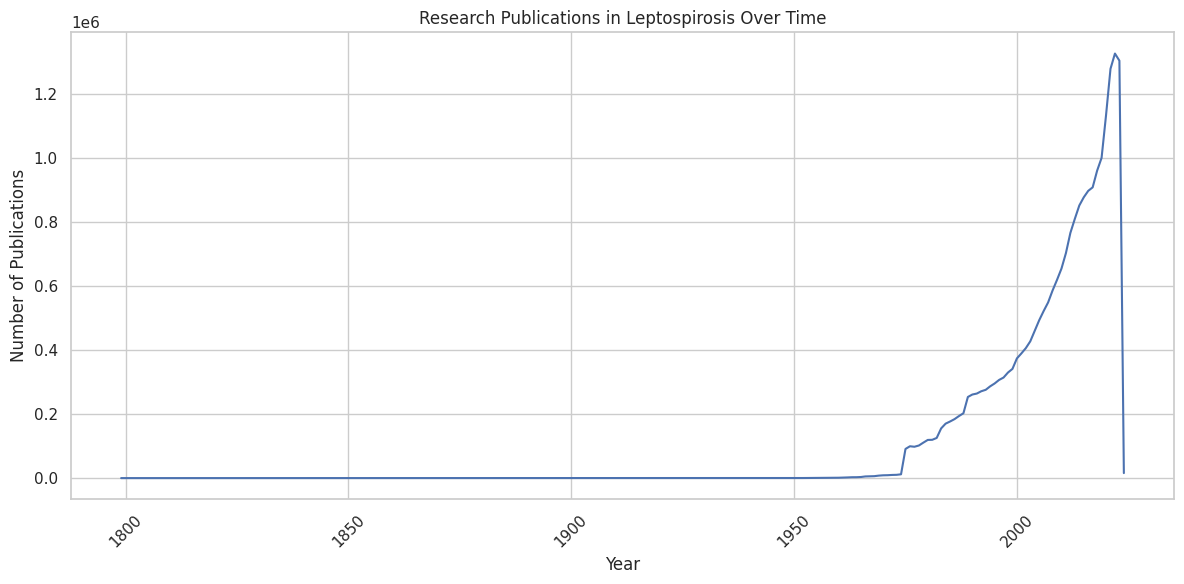

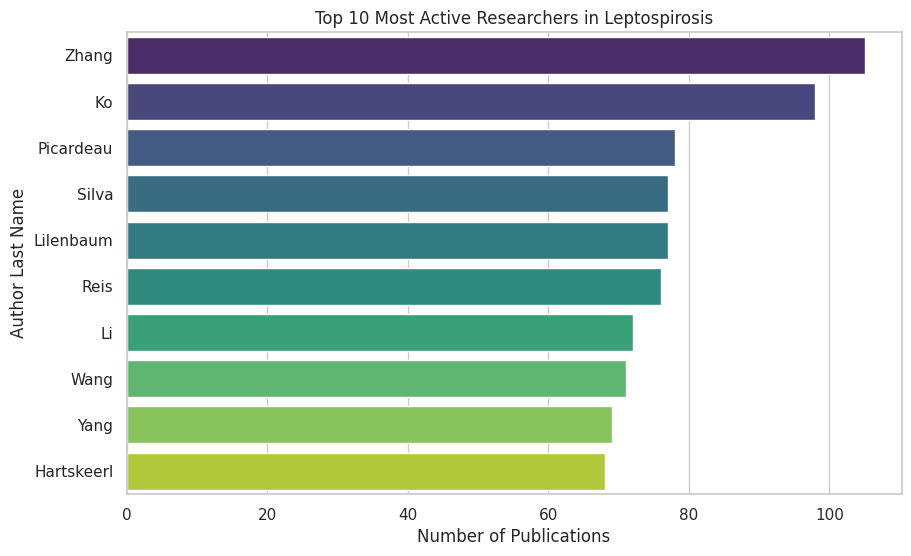

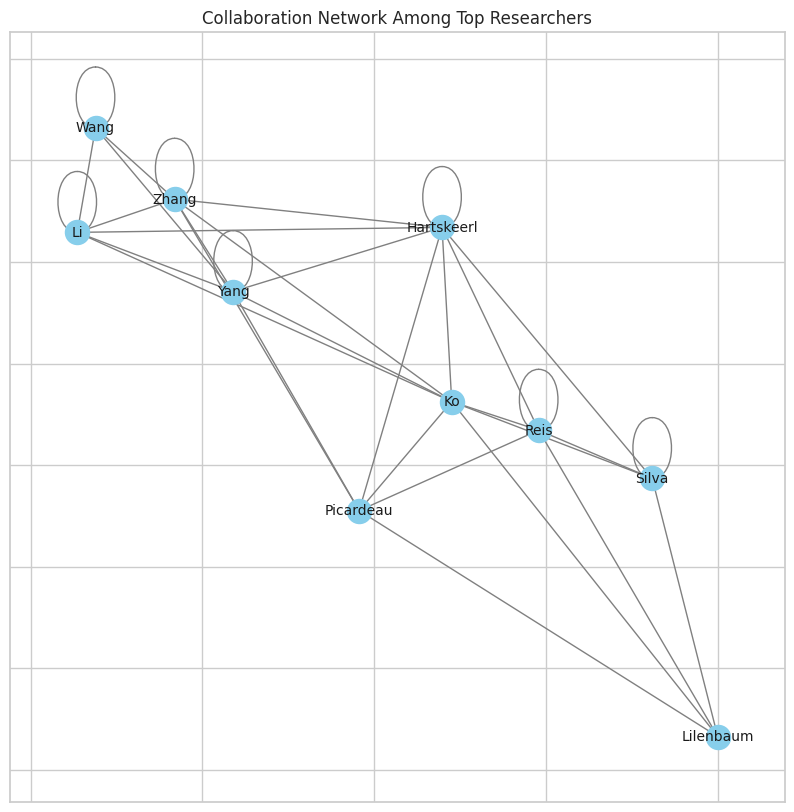

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from collections import Counter

# Analysis and Visualization 1: Most active researchers
# Counting the number of publications for each author
author_counts = authors_df['AuthorLastname'].value_counts().head(10)

# Visualization 2: Collaboration Networks among Top Researchers
# Filtering the dataset to include only the top researchers
top_authors = author_counts.index.tolist()
top_authors_df = authors_df[authors_df['AuthorLastname'].isin(top_authors)]

# Creating a graph to represent collaborations
collab_graph = nx.Graph()

for _, article in top_authors_df.groupby('PMID'):
    authors = article['AuthorLastname'].tolist()
    for i in range(len(authors)):
        for j in range(i+1, len(authors)):
            if collab_graph.has_edge(authors[i], authors[j]):
                collab_graph[authors[i]][authors[j]]['weight'] += 1
            else:
                collab_graph.add_edge(authors[i], authors[j], weight=1)

# Visualization 3: Research Trends Over Time
# Plotting the annual publication count
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Count', data=paper_counts_df)
plt.title('Research Publications in Leptospirosis Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Publications')
plt.xticks(rotation=45)
plt.tight_layout()

# Displaying the three visualizations
plt.figure(figsize=(10, 6))
sns.barplot(x=author_counts.values, y=author_counts.index, palette="viridis")
plt.title('Top 10 Most Active Researchers in Leptospirosis')
plt.xlabel('Number of Publications')
plt.ylabel('Author Last Name')

plt.figure(figsize=(10, 10))
pos = nx.spring_layout(collab_graph, k=0.1)
nx.draw_networkx(collab_graph, pos, with_labels=True, node_color='skyblue', edge_color='gray', font_size=10)
plt.title('Collaboration Network Among Top Researchers')
plt.show()


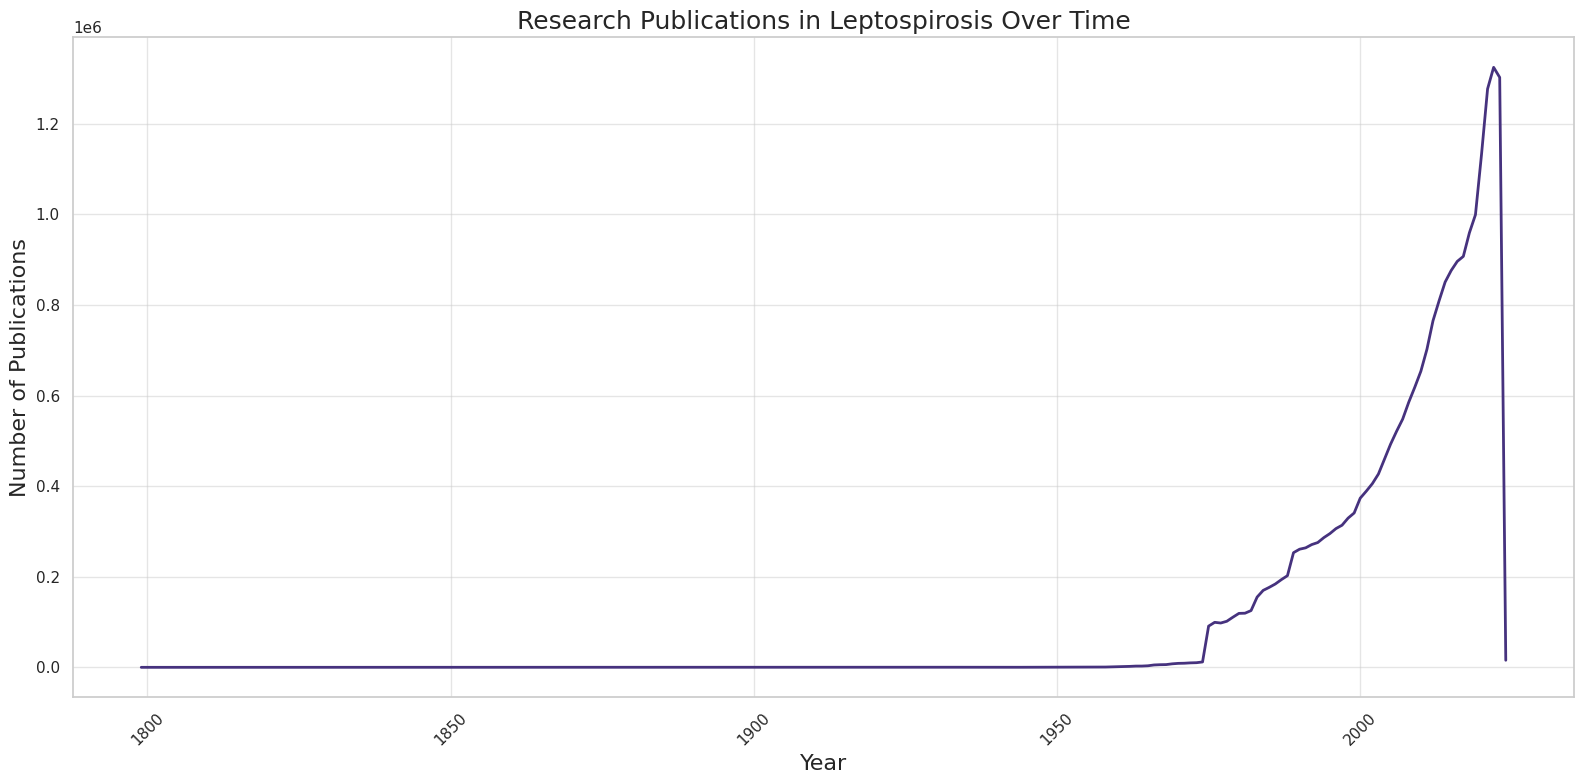

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set style and color palette
sns.set(style="whitegrid", palette="viridis")

# Create a larger figure
plt.figure(figsize=(16, 8))  # Increase the figure size (adjust as needed)

# Plot the line plot
sns.lineplot(x='Year', y='Count', data=paper_counts_df, linewidth=2)

# Set title and labels with increased font size
plt.title('Research Publications in Leptospirosis Over Time', fontsize=18)  # Increase the font size
plt.xlabel('Year', fontsize=16)  # Increase the font size
plt.ylabel('Number of Publications', fontsize=16)  # Increase the font size

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add grid lines for better readability
plt.grid(True, alpha=0.5)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


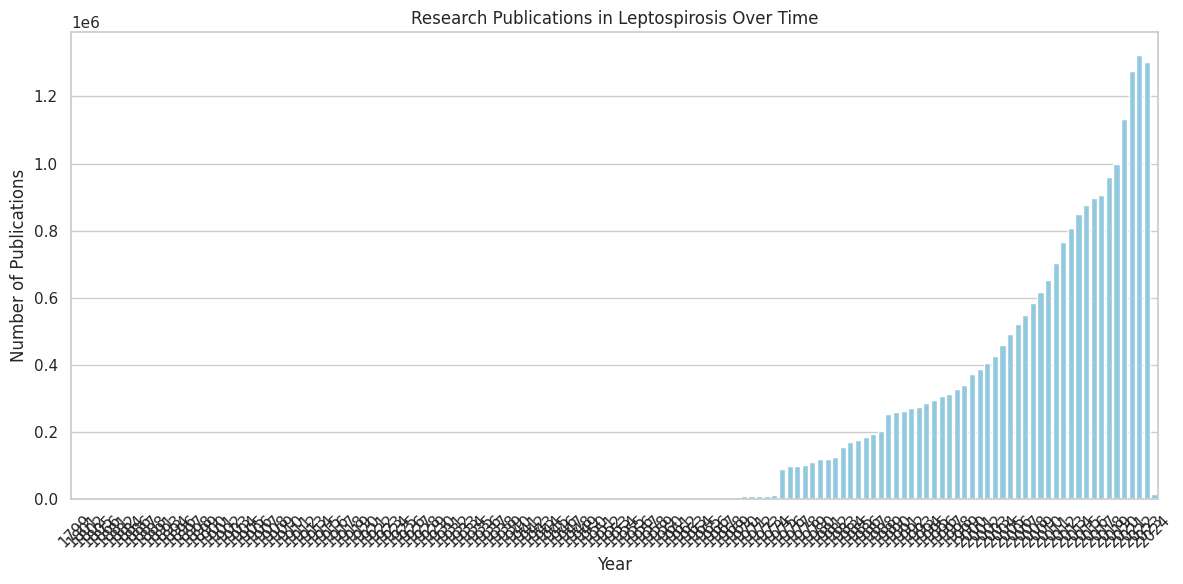

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(x='Year', y='Count', data=paper_counts_df, color='skyblue')
plt.title('Research Publications in Leptospirosis Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Publications')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
